# Proyek Analisis Data: E-Commerance Public Dataset
- **Nama:** Nuzulurrahmah
- **Email:** m322d4kx3015@bangkit.academy
- **ID Dicoding:** nuzulurrahmah

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki jumlah customer paling banyak dan paling sedikit?
- Kota mana yang memiliki jumlah seller paling banyak dan paling sedikit?
- Jenis pembayaran yang paling umum digunakan oleh customer?
- Bagaimana tingkat kepuasan pelanggan terhadap orderan? 
- Pada hari apa jumlah pemesanan pelanggan mencapai puncaknya secara keseluruhan?
- Pada jam berapa pelanggan cenderung melakukan pemesanan terbanyak secara keseluruhan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Customer

In [2]:
customer_df=pd.read_csv("E-Commerce Public Dataset\customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Geolocation

In [3]:
geolocation_df=pd.read_csv("E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Order Item

In [4]:
item_df=pd.read_csv("E-Commerce Public Dataset\order_items_dataset.csv")
item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Order Payment

In [5]:
payment_df=pd.read_csv("E-Commerce Public Dataset\order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Order Review

In [6]:
review_df=pd.read_csv("E-Commerce Public Dataset\order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Order Dataset

In [7]:
order_dataset_df=pd.read_csv("E-Commerce Public Dataset\orders_dataset.csv")
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Product Category Name

In [8]:
product_category_df=pd.read_csv("E-Commerce Public Dataset\product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Product Dataset

In [9]:
product_dataset_df=pd.read_csv("E-Commerce Public Dataset\products_dataset.csv")
product_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Seller Dataset

In [10]:
seller_df=pd.read_csv("E-Commerce Public Dataset\sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assesing and Cleaning Data

#### Customer Data

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Duplicated data: ",customer_df.duplicated().sum())

Duplicated data:  0


In [14]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Geolocation Data

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Duplicated Data: ", geolocation_df.duplicated().sum())
geolocation_df.describe()


Duplicated Data:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [19]:
geolocation_df.drop_duplicates(inplace=True)
print("Duplicated Data ",geolocation_df.duplicated().sum())

Duplicated Data  0


#### Item

In [20]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
print("Duplicated Data: ",item_df.duplicated().sum())
item_df.describe()

Duplicated Data:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Payment

In [23]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
print("Duplicated Data: ",payment_df.duplicated().sum())
payment_df.describe()

Duplicated Data:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [25]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Review

In [26]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [27]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [28]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [29]:
miss_val=['review_comment_title','review_comment_message']
review_df.drop(columns=miss_val, inplace=True)

In [30]:
review_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [31]:
review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [32]:
review_df.duplicated().sum()

0

In [33]:
review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Order Dataset

In [34]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [35]:
order_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [36]:
order_dataset_df['order_purchase_timestamp'] = pd.to_datetime(order_dataset_df['order_purchase_timestamp'])
order_dataset_df['order_approved_at'] = pd.to_datetime(order_dataset_df['order_approved_at'])
order_dataset_df['order_delivered_carrier_date'] = pd.to_datetime(order_dataset_df['order_delivered_carrier_date'])
order_dataset_df['order_delivered_customer_date'] = pd.to_datetime(order_dataset_df['order_delivered_customer_date'])
order_dataset_df['order_estimated_delivery_date'] = pd.to_datetime(order_dataset_df['order_estimated_delivery_date'])

In [37]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Product Category


In [38]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [39]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [40]:
print("Duplicated Data: ", product_category_df.duplicated().sum())
product_category_df.describe()

Duplicated Data:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Product Dataset

In [41]:
product_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
print("Duplicated Data: ",product_dataset_df.isna().sum())
product_dataset_df.describe()

Duplicated Data:  product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Seller

In [43]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [45]:
print("Duplicated Data: ",seller_df.duplicated().sum())
seller_df.describe()

Duplicated Data:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## Exploratory Data Analysis (EDA)

#### Explore Kota Seller

In [46]:
top_seller_city = seller_df['seller_city'].value_counts().head(10)
pd.DataFrame(top_seller_city)

,count
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [47]:
tail_seller_city = seller_df['seller_city'].value_counts().tail(10)
pd.DataFrame(tail_seller_city)

,count
seller_city,
pedregulho,1
juzeiro do norte,1
angra dos reis,1
sp / sp,1
pirassununga,1
taruma,1
s jose do rio preto,1
domingos martins,1
messias targino,1


#### Explore Kota Customer

In [48]:
top_customer_city = customer_df['customer_city'].value_counts().head(10)
pd.DataFrame(top_customer_city)

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [49]:
tail_customer_city = customer_df['customer_city'].value_counts().tail(10)
pd.DataFrame(tail_customer_city)

,count
customer_city,
machadinho,1
divino das laranjeiras,1
galia,1
lagoa de sao francisco,1
uniao da serra,1
bequimao,1
andarai,1
vargem grande,1
curvelandia,1


#### Explore Tipe Pembayaran Customer

In [50]:
payment_dist=payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
print(payment_dist)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64


#### Explore Kepuasan Pelanggan

In [51]:
hasil_review=review_df.groupby(by="review_score").order_id.nunique().sort_index(ascending=False)
print(hasil_review)

review_score
5    57076
4    19098
3     8160
2     3148
1    11393
Name: order_id, dtype: int64


In [52]:
positive = hasil_review.loc[[4, 5]].sum()
neutral = hasil_review.loc[3]
bad = hasil_review.loc[[1, 2]].sum()

print("Positive:{}\nNeutral:{}\nBad:{}".format(positive, neutral,bad))

Positive:76174
Neutral:8160
Bad:14541


#### Explore Banyak Orderan Berdasarkan Hari dan Jam

In [53]:
order_dataset_df['order_date'] = order_dataset_df['order_purchase_timestamp'].astype('datetime64[ns]')

order_dataset_df['order_day'] = order_dataset_df['order_date'].dt.day_name()
order_dataset_df['order_hour'] = order_dataset_df['order_date'].dt.hour

In [54]:
orders_by_day = order_dataset_df.groupby(order_dataset_df['order_day'])['order_id'].count().reset_index()
orders_by_day = orders_by_day.sort_values(by='order_id', ascending=False)
orders_by_day.rename(columns={ 'order_day':'Day', 'order_id':'order_counts'}, inplace=True)
orders_by_day

,Day,order_counts
1,Monday,16196
5,Tuesday,15963
6,Wednesday,15552
4,Thursday,14761
0,Friday,14122
3,Sunday,11960
2,Saturday,10887


In [55]:
order_dataset_df['order_hour'] = order_dataset_df['order_purchase_timestamp'].dt.hour
orders_by_hour = order_dataset_df.groupby('order_hour')['order_id'].count().reset_index()
orders_by_hour = orders_by_hour.sort_values(by='order_id', ascending=False)
orders_by_hour.rename(columns={'order_hour': 'Hour', 'order_id': 'order_counts'}, inplace=True)
orders_by_hour['Hour'] = orders_by_hour['Hour'].apply(lambda x: f'{x:02d}:00')

print(orders_by_hour)

     Hour  order_counts
16  16:00          6675
11  11:00          6578
14  14:00          6569
13  13:00          6518
15  15:00          6454
21  21:00          6217
20  20:00          6193
10  10:00          6177
17  17:00          6150
12  12:00          5995
19  19:00          5982
22  22:00          5816
18  18:00          5769
9   09:00          4785
23  23:00          4123
8   08:00          2967
0   00:00          2394
7   07:00          1231
1   01:00          1170
2   02:00           510
6   06:00           502
3   03:00           272
4   04:00           206
5   05:00           188


## Visualization & Explanatory Analysis

#### Pertanyaan 1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9204\43958421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customer_city.values, y=top_customer_city.index, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9204\43958421.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tail_customer_city.values, y=tail_customer_city.index, palette='viridis')


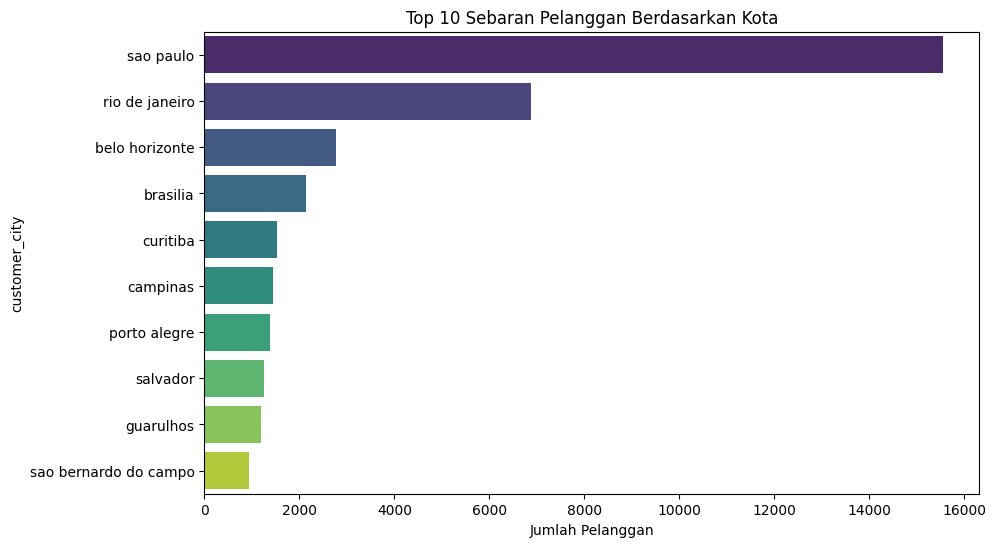

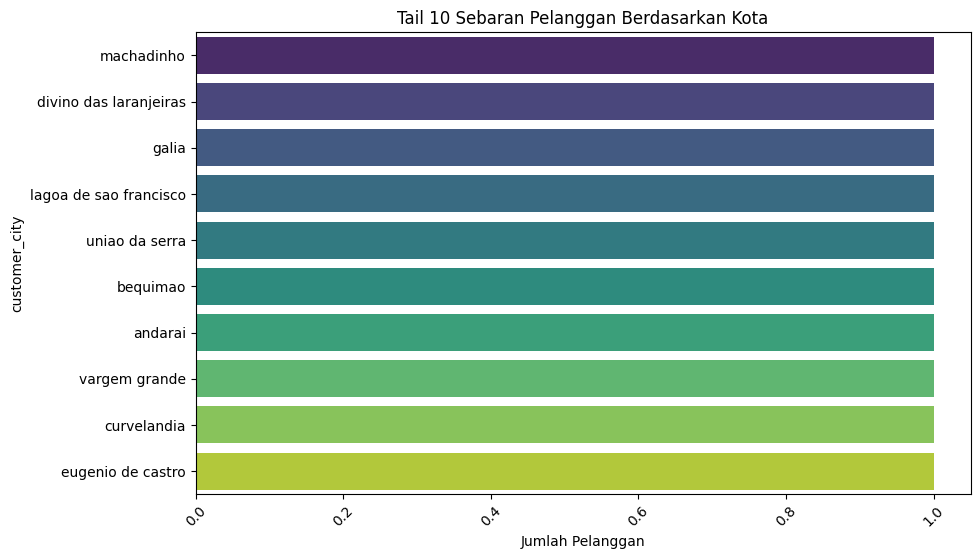

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customer_city.values, y=top_customer_city.index, palette='viridis')
plt.title('Top 10 Sebaran Pelanggan Berdasarkan Kota')
plt.xlabel('Jumlah Pelanggan')

plt.figure(figsize=(10, 6))
sns.barplot(x=tail_customer_city.values, y=tail_customer_city.index, palette='viridis')
plt.title('Tail 10 Sebaran Pelanggan Berdasarkan Kota')
plt.xlabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()


#### Pertanyaan 2

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9204\1915541689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_seller_city.values, y=top_seller_city.index, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9204\1915541689.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tail_seller_city.values, y=tail_seller_city.index, palette='viridis')


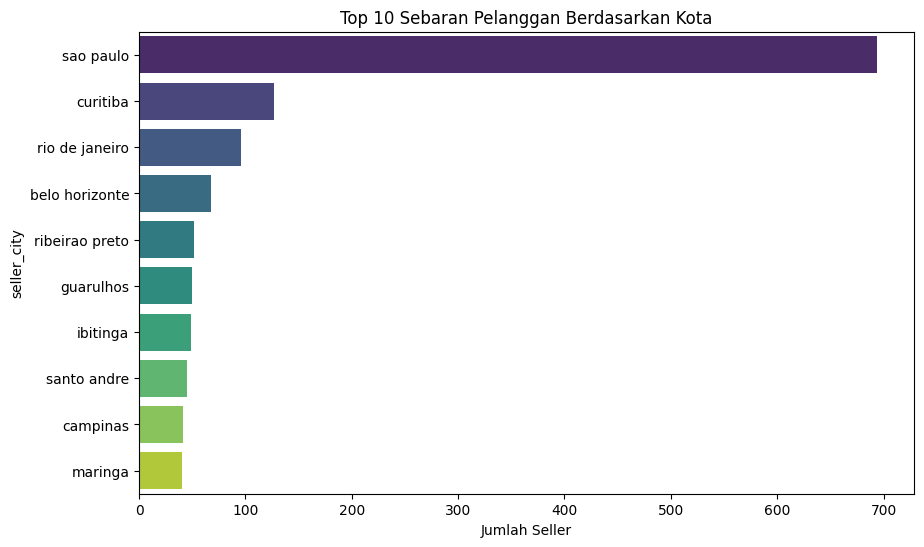

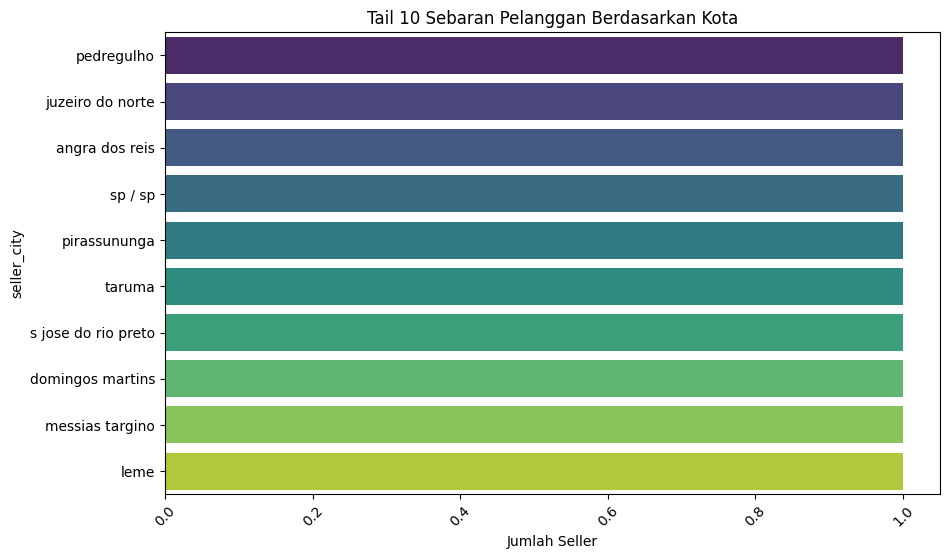

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_seller_city.values, y=top_seller_city.index, palette='viridis')
plt.title('Top 10 Sebaran Pelanggan Berdasarkan Kota')
plt.xlabel('Jumlah Seller')

plt.figure(figsize=(10, 6))
sns.barplot(x=tail_seller_city.values, y=tail_seller_city.index, palette='viridis')
plt.title('Tail 10 Sebaran Pelanggan Berdasarkan Kota')
plt.xlabel('Jumlah Seller')
plt.xticks(rotation=45)
plt.show()

#### Pertanyaan 3

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64


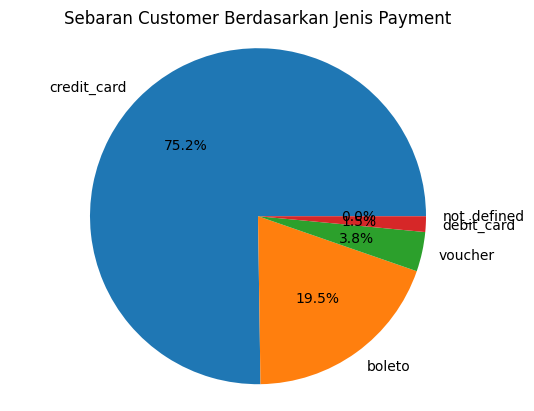

In [58]:
payment_dist=payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
print(payment_dist)

labels = payment_dist.index
sizes = payment_dist.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sebaran Customer Berdasarkan Jenis Payment')
plt.axis('equal')
plt.show()



#### Pertanyaan 4

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9204\3088327990.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=1.25)


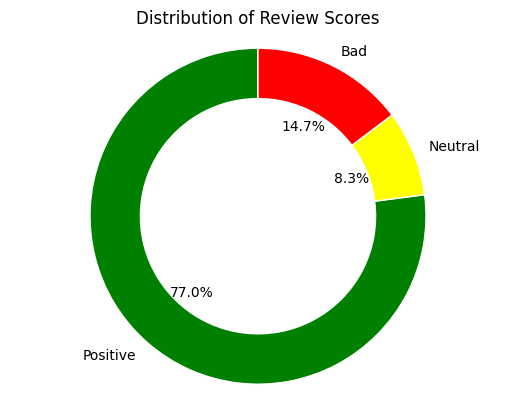

In [59]:
categories = ['Positive', 'Neutral', 'Bad']
values = [positive, neutral, bad]
colors = ['green', 'yellow', 'red']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors,
                                  wedgeprops=dict(width=0.3, edgecolor='w'))
centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=1.25)
ax.add_artist(centre_circle)
ax.axis('equal') 

plt.title('Distribution of Review Scores')
plt.show()


#### Pertanyaan 5

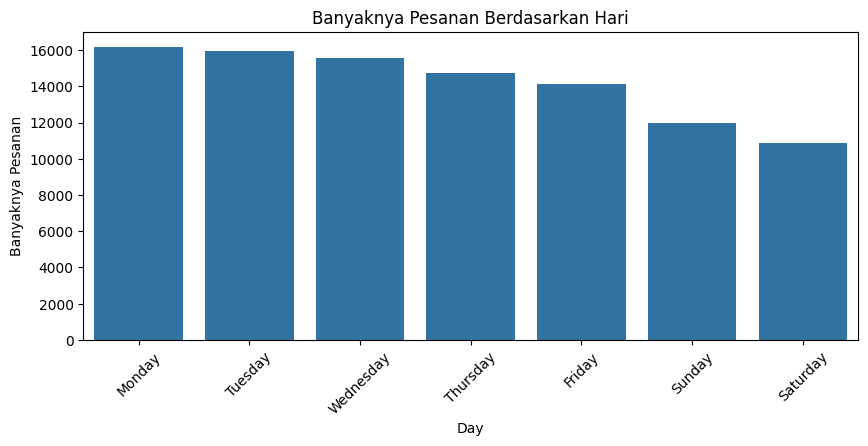

In [60]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Day', y='order_counts', data=orders_by_day, order=orders_by_day.sort_values('order_counts', ascending=False)['Day'])
plt.title('Banyaknya Pesanan Berdasarkan Hari')
plt.ylabel('Banyaknya Pesanan')
plt.xticks(rotation=45)
plt.show()

#### Pertanyaan 6

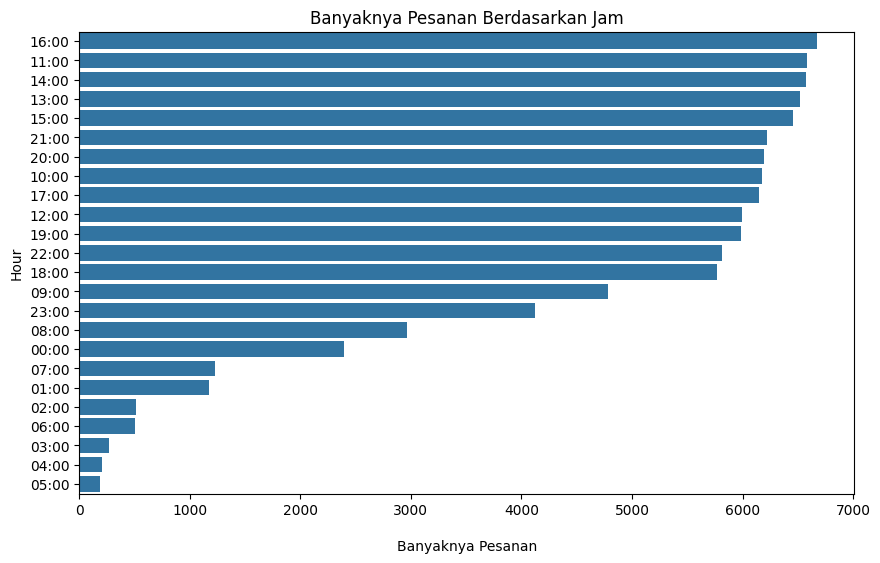

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='order_counts', y='Hour', data=orders_by_hour, order=orders_by_hour.sort_values('order_counts', ascending=False)['Hour'])
plt.title('Banyaknya Pesanan Berdasarkan Jam')
plt.xlabel('\nBanyaknya Pesanan')
plt.yticks(rotation=0) 
plt.show()


In [66]:
merged_data = pd.merge(customer_df, order_dataset_df, on='customer_id')
merged_data = pd.merge(merged_data, payment_df, on='order_id')
merged_data = pd.merge(merged_data, review_df, on='order_id')
merged_data = pd.merge(merged_data, item_df, on='order_id')
merged_data = pd.merge(merged_data, seller_df, on='seller_id')
merged_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-10 22:43:29,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP


In [ ]:
merged_data.to_csv("all_data.csv", index=False)

## Conclusion

- Conclusion Pertanyaan 1:

Kota dengan jumlah pelanggan terbanyak adalah Sao Paulo, dengan hampir 16.000 pelanggan berasal dari kota tersebut. Terdapat lebih dari 5 kota yang hanya memiliki 1 pelanggan. Perlu dilakukan peningkatan lebih lanjut agar jumlah pelanggan dari kota tersebut tidak merosot kedepannya serta dilakukan penyelidikan penyebab sedikitnay pelanggan dari beberapa kota.

- Conclusion Pertanyaan 2:

Kota dengan jumlah penjual terbanyak adalah Sao Paulo, dengan hampir 700 penjual berasal dari kota tersebut. Terdapat lebih dari 5 kota yang hanya memiliki 1 penjual.

- Conclusion Pertanyaan 3:

Secara keseluruhan, jenis pembayaran yang paling diminati oleh pelanggan adalah kartu kredit, mencapai 75%.

- Conclusion Pertanyaan 4:

Berdasarkan ulasan pelanggan, lebih dari 77% dari mereka merasa puas dengan pesanan mereka. Namun, sekitar 14% memberikan ulasan negatif. Perlu dilakukan peningkatan kualitas baik dari produk ataupun waktu delivery guna meningkatkan kepuasan customer

- Conclusion Pertanyaan 5:

Secara keseluruhan, customer paling banyak melakukan pesanan pada hari Senin hingga terdapat lebih dari 16.000 pesanan. Namun, pesanan paling sedikit masuk pada hari Sabtu. Untuk membuat pesanan terdistribusi secara lebih merata setiap harinya, dapat diberlakukan potongan harga pada hari Sabtu untuk menarik perhatian customer kedepannya

- Conclusion Pertanyaan 6:

Jam 16:00 merupakan waktu paling sering pelanggan berbelanja, dengan pesanan mencapai lebih dari 7.000 pesanan, sementara jam 5 pagi merupakan waktu dengan jumlah pesanan paling sedikit.





